In [1]:
!unzip f.zip

Archive:  f.zip
   creating: __MACOSX/
  inflating: __MACOSX/._README.md    
  inflating: __MACOSX/._app.ipynb    
  inflating: __MACOSX/._cnn_from_scratch.ipynb  
  inflating: __MACOSX/._requirements.txt  
  inflating: __MACOSX/._src          
  inflating: __MACOSX/._static_images  
  inflating: __MACOSX/._transfer_learning.ipynb  
   creating: __MACOSX/src/
  inflating: __MACOSX/src/.___init__.py  
  inflating: __MACOSX/src/._create_submit_pkg.py  
  inflating: __MACOSX/src/._data.py  
  inflating: __MACOSX/src/._helpers.py  
  inflating: __MACOSX/src/._model.py  
  inflating: __MACOSX/src/._optimization.py  
  inflating: __MACOSX/src/._predictor.py  
  inflating: __MACOSX/src/._train.py  
  inflating: __MACOSX/src/._transfer.py  
   creating: __MACOSX/static_images/
  inflating: __MACOSX/static_images/._icons  
  inflating: __MACOSX/static_images/._sample_landmark_output.png  
  inflating: __MACOSX/static_images/._test  
  inflating: __MACOSX/static_images/._train  
   creating: __M

# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [2]:
# Install requirements
#!pip install -r requirements.txt | grep -v "already satisfied"

In [3]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
done


Computing std: 100%|████████████████████████| 6246/6246 [01:18<00:00, 79.59it/s]


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended.

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [4]:
file_path = "src/data.py"

# Open the file and read its contents
with open(file_path, "r") as file:
    contents = file.read()

# Display the contents of the file
print(contents)

import math
import torch
import torch.utils.data
from pathlib import Path
from torchvision import datasets, transforms
import multiprocessing

from .helpers import compute_mean_and_std, get_data_location
import matplotlib.pyplot as plt


def get_data_loaders(
    batch_size: int = 32, valid_size: float = 0.2, num_workers: int = -1, limit: int = -1
):
    """
    Create and returns the train_one_epoch, validation and test data loaders.

    :param batch_size: size of the mini-batches
    :param valid_size: fraction of the dataset to use for validation. For example 0.2
                       means that 20% of the dataset will be used for validation
    :param num_workers: number of workers to use in the data loaders. Use -1 to mean
                        "use all my cores"
    :param limit: maximum number of data points to consider
    :return a dictionary with 3 keys: 'train_one_epoch', 'valid' and 'test' containing respectively the
            train_one_epoch, validation and test data

In [5]:
# Save the function to a Python file
with open('src/data.py', 'w') as file:
    file.write('''\
import math
import torch
import torch.utils.data
from pathlib import Path
from torchvision import datasets, transforms
import multiprocessing

from .helpers import compute_mean_and_std, get_data_location
import matplotlib.pyplot as plt


def get_data_loaders(
    batch_size: int = 32, valid_size: float = 0.2, num_workers: int = -1, limit: int = -1
):
    """
    Create and returns the train_one_epoch, validation and test data loaders.

    :param batch_size: size of the mini-batches
    :param valid_size: fraction of the dataset to use for validation. For example 0.2
                       means that 20% of the dataset will be used for validation
    :param num_workers: number of workers to use in the data loaders. Use -1 to mean
                        "use all my cores"
    :param limit: maximum number of data points to consider
    :return a dictionary with 3 keys: 'train_one_epoch', 'valid' and 'test' containing respectively the
            train_one_epoch, validation and test data loaders
    """

    if num_workers == -1:
        # Use all cores
        num_workers = multiprocessing.cpu_count()

    # We will fill this up later
    data_loaders = {"train": None, "valid": None, "test": None}

    base_path = Path(get_data_location())

    # Compute mean and std of the dataset
    mean, std = compute_mean_and_std()
    print(f"Dataset mean: {mean}, std: {std}")

    # YOUR CODE HERE:
    # create 3 sets of data transforms: one for the training dataset,
    # containing data augmentation, one for the validation dataset
    # (without data augmentation) and one for the test set (again
    # without augmentation)
    # HINT: resize the image to 256 first, then crop them to 224, then add the
    # appropriate transforms for that step
    data_transforms = {
        "train": transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomRotation(30),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ]
        ),
        "valid": transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ]
        ),
        "test": transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ]
        ),
    }

    # Create train and validation datasets
    train_data = datasets.ImageFolder(
        base_path / "train",
        # YOUR CODE HERE: add the appropriate transform that you defined in
        # the data_transforms dictionary
        transform= data_transforms["train"]
    )
    # The validation dataset is a split from the train_one_epoch dataset, so we read
    # from the same folder, but we apply the transforms for validation
    valid_data = datasets.ImageFolder(
        base_path / "train",
        # YOUR CODE HERE: add the appropriate transform that you defined in
        # the data_transforms dictionary
        transform= data_transforms["valid"]
    )

    # obtain training indices that will be used for validation
    n_tot = len(train_data)
    indices = torch.randperm(n_tot)

    # If requested, limit the number of data points to consider
    if limit > 0:
        indices = indices[:limit]
        n_tot = limit

    split = int(math.ceil(valid_size * n_tot))
    train_idx, valid_idx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
    valid_sampler  = torch.utils.data.SubsetRandomSampler(valid_idx)

    # prepare data loaders
    data_loaders["train"] = torch.utils.data.DataLoader(
        train_data,
        batch_size=batch_size,
        sampler=train_sampler,
        num_workers=num_workers,
    )
    data_loaders["valid"] = torch.utils.data.DataLoader(
        valid_data,
        batch_size=batch_size,
        sampler=valid_sampler,
        num_workers=num_workers
    )

    # Now create the test data loader
    test_data = datasets.ImageFolder(
        base_path / "test",
        # YOUR CODE HERE (add the test transform)
        transform=data_transforms['test']
    )

    if limit > 0:
        indices = torch.arange(limit)
        test_sampler = torch.utils.data.SubsetRandomSampler(indices)
    else:
        test_sampler = None

    data_loaders["test"] = torch.utils.data.DataLoader(
        # YOUR CODE HERE (remember to add shuffle=False as well)
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

    return data_loaders


def visualize_one_batch(data_loaders, max_n: int = 5):
    """
    Visualize one batch of data.

    :param data_loaders: dictionary containing data loaders
    :param max_n: maximum number of images to show
    :return: None
    """

    # YOUR CODE HERE:
    # obtain one batch of training images
    # First obtain an iterator from the train dataloader
    dataiter  = iter(data_loaders["train"]) # YOUR CODE HERE
    # Then call the .next() method on the iterator you just
    # obtained
    images, labels  = next(dataiter) # YOUR CODE HERE

    # Undo the normalization (for visualization purposes)
    mean, std = compute_mean_and_std()
    invTrans = transforms.Compose(
        [
            transforms.Normalize(mean=[0.0, 0.0, 0.0], std=1 / std),
            transforms.Normalize(mean=-mean, std=[1.0, 1.0, 1.0]),
        ]
    )

    images = invTrans(images)

    # YOUR CODE HERE:
    # Get class names from the train data loader
    class_names = data_loaders["train"].dataset.classes # YOUR CODE HERE

    # Convert from BGR (the format used by pytorch) to
    # RGB (the format expected by matplotlib)
    images = torch.permute(images, (0, 2, 3, 1)).clip(0, 1)

    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 4))
    for idx in range(max_n):
        ax = fig.add_subplot(1, max_n, idx + 1, xticks=[], yticks=[])
        ax.imshow(images[idx])
        # print out the correct label for each image
        # .item() gets the value contained in a Tensor
        ax.set_title(class_names[labels[idx].item()])


######################################################################################
#                                     TESTS
######################################################################################
import pytest


@pytest.fixture(scope="session")
def data_loaders():
    return get_data_loaders(batch_size=2, num_workers=0)


def test_data_loaders_keys(data_loaders):

    assert set(data_loaders.keys()) == {"train", "valid", "test"}, "The keys of the data_loaders dictionary should be train, valid and test"


def test_data_loaders_output_type(data_loaders):
    # Test the data loaders
    dataiter = iter(data_loaders["train"])
    images, labels = next(dataiter)

    assert isinstance(images, torch.Tensor), "images should be a Tensor"
    assert isinstance(labels, torch.Tensor), "labels should be a Tensor"
    assert images[0].shape[-1] == 224, "The tensors returned by your dataloaders should be 224x224. Did you " \
                                       "forget to resize and/or crop?"


def test_data_loaders_output_shape(data_loaders):
    dataiter = iter(data_loaders["train"])
    images, labels = next(dataiter)

    assert len(images) == 2, f"Expected a batch of size 2, got size {len(images)}"
    assert (
        len(labels) == 2
    ), f"Expected a labels tensor of size 2, got size {len(labels)}"


def test_visualize_one_batch(data_loaders):

    visualize_one_batch(data_loaders, max_n=2)''')

In [6]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 2.09s ========================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ```
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
>
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data.
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> **Answer**: My code first resizes the image to 256 and then crops to 224. I picked 224 as the input size because it is the recommended input size for using pytorch's pre-trained models. I did decide to augment the dataset via RandAugment, a typical set of augmentations for natural images. I added this augmentation with the goal of improving my model's robustness, thus improving test accuracy.

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [7]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 2.26s ========================


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


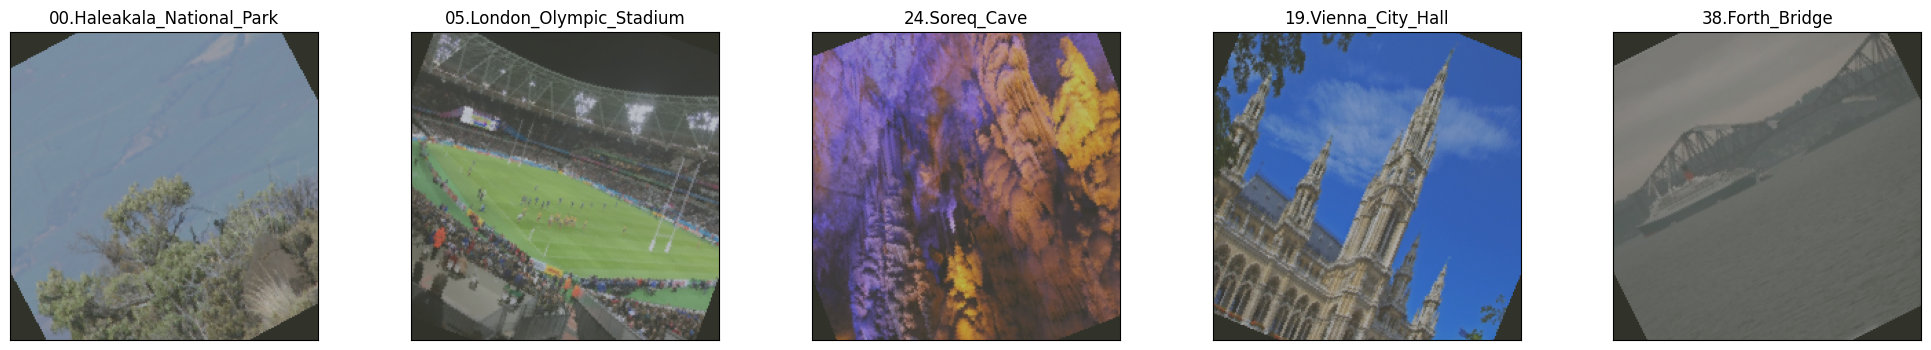

In [8]:
%matplotlib inline
import pytest
import multiprocessing
from src.data import visualize_one_batch, get_data_loaders


# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size=5, valid_size=0.01, num_workers=-1) # YOUR CODE HERE

visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [9]:
file_path = "src/model.py"

# Open the file and read its contents
with open(file_path, "r") as file:
    contents = file.read()

# Display the contents of the file
print(contents)

import torch
import torch.nn as nn


# define the CNN architecture
class MyModel(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.7) -> None:

        super().__init__()

        # YOUR CODE HERE
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=256, out_channels=1000, kernel_size=3, stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

        # Define the classifier layers
        self.classifier = nn.Sequential(
            nn.Linear(1000, 7000),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(7000, num_classes),
            nn.Softmax(dim=1)
        )
        # Define a CNN architecture. Remember to use the variable num_classes


In [10]:
# Save the function to a Python file
with open('src/model.py', 'w') as file:
    file.write('''\
import torch
import torch.nn as nn

# define the CNN architecture
class MyModel(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.7) -> None:

        super().__init__()

        # YOUR CODE HERE
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3),
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2),
        self.conv2 = nn.Conv2d(10, 20, 3),
        self.fc1 = nn.Linear(20*224*224, 7000),
        self.fc2 = nn.Linear(7000, num_classes)

        self.relu = nn.ReLu()
        self.activation = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(dropout)

        # Define a CNN architecture. Remember to use the variable num_classes
        # to size appropriately the output of your classifier, and if you use
        # the Dropout layer, use the variable "dropout" to indicate how much
        # to use (like nn.Dropout(p=dropout))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # YOUR CODE HERE: process the input tensor through the
        # feature extractor, the pooling and the final linear
        # layers (if appropriate for the architecture chosen)

        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.activation(self.fc3(x))

        return x


######################################################################################
#                                     TESTS
######################################################################################
import pytest


@pytest.fixture(scope="session")
def data_loaders():
    from .data import get_data_loaders

    return get_data_loaders(batch_size=2)


def test_model_construction(data_loaders):

    model = MyModel(num_classes=23, dropout=0.3)

    dataiter = iter(data_loaders["train"])
    images, labels = next(dataiter)

    out = model(images)

    assert isinstance(
        out, torch.Tensor
    ), "The output of the .forward method should be a Tensor of size ([batch_size], [n_classes])"

    assert out.shape == torch.Size(
        [2, 23]
    ), f"Expected an output tensor of size (2, 23), got {out.shape}"
''')

In [12]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                               

src/model.py::test_model_construction ^C


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> __Answer:__ I decided to use 5 convolutional layers so that my model could be sufficiently expressive. I used dropout layers to reduce my model's tendency to overfit the training data. I made my model output a 50-dimensional vector to match with the 50 available landmark classes.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [13]:
# Save the function to a Python file
with open('src/optimization.py', 'w') as file:
    file.write('''\
import torch
import torch.nn as nn
import torch.optim


def get_loss():
    """
    Get an instance of the CrossEntropyLoss (useful for classification),
    optionally moving it to the GPU if use_cuda is set to True
    """

    # YOUR CODE HERE: select a loss appropriate for classification
    loss  = nn.CrossEntropyLoss()

    return loss


def get_optimizer(
    model: nn.Module,
    optimizer: str = "SGD",
    learning_rate: float = 0.01,
    momentum: float = 0.5,
    weight_decay: float = 0,
):
    """
    Returns an optimizer instance

    :param model: the model to optimize
    :param optimizer: one of 'SGD' or 'Adam'
    :param learning_rate: the learning rate
    :param momentum: the momentum (if the optimizer uses it)
    :param weight_decay: regularization coefficient
    """
    if optimizer.lower() == "sgd":
        # YOUR CODE HERE: create an instance of the SGD
        # optimizer. Use the input parameters learning_rate, momentum
        # and weight_decay
        opt = torch.optim.SGD(
            model.parameters(), lr= learning_rate, momentum=momentum,
            weight_decay= weight_decay
        )

    elif optimizer.lower() == "adam":
        # YOUR CODE HERE: create an instance of the Adam
        # optimizer. Use the input parameters learning_rate, momentum
        # and weight_decay
        opt = torch.optim.Adam(
            model.parameters(), lr=learning_rate,
            weight_decay= weight_decay
        )
    else:
        raise ValueError(f"Optimizer {optimizer} not supported")

    return opt


######################################################################################
#                                     TESTS
######################################################################################
import pytest


@pytest.fixture(scope="session")
def fake_model():
    return nn.Linear(16, 256)


def test_get_loss():

    loss = get_loss()

    assert isinstance(
        loss, nn.CrossEntropyLoss
    ), f"Expected cross entropy loss, found {type(loss)}"


def test_get_optimizer_type(fake_model):

    opt = get_optimizer(fake_model)

    assert isinstance(opt, torch.optim.SGD), f"Expected SGD optimizer, got {type(opt)}"


def test_get_optimizer_is_linked_with_model(fake_model):

    opt = get_optimizer(fake_model)

    assert opt.param_groups[0]["params"][0].shape == torch.Size([256, 16])


def test_get_optimizer_returns_adam(fake_model):

    opt = get_optimizer(fake_model, optimizer="adam")

    assert opt.param_groups[0]["params"][0].shape == torch.Size([256, 16])
    assert isinstance(opt, torch.optim.Adam), f"Expected SGD optimizer, got {type(opt)}"


def test_get_optimizer_sets_learning_rate(fake_model):

    opt = get_optimizer(fake_model, optimizer="adam", learning_rate=0.123)

    assert (
        opt.param_groups[0]["lr"] == 0.123
    ), "get_optimizer is not setting the learning rate appropriately. Check your code."


def test_get_optimizer_sets_momentum(fake_model):

    opt = get_optimizer(fake_model, optimizer="SGD", momentum=0.123)

    assert (
        opt.param_groups[0]["momentum"] == 0.123
    ), "get_optimizer is not setting the momentum appropriately. Check your code."


def test_get_optimizer_sets_weight_decat(fake_model):

    opt = get_optimizer(fake_model, optimizer="SGD", weight_decay=0.123)

    assert (
        opt.param_groups[0]["weight_decay"] == 0.123
    ), "get_optimizer is not setting the weight_decay appropriately. Check your code."
''')

In [14]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 4.59s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [15]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.56s ========================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [16]:
# Save the function to a Python file
with open('src/train.py', 'w') as file:
    file.write('''\
def train_one_epoch(train_dataloader, model, optimizer, loss):
    """
    Performs one train_one_epoch epoch
    """

    if torch.cuda.is_available():
        # YOUR CODE HERE: transfer the model to the GPU
        # HINT: use .cuda()
        device = torch.device("cuda")
        model.to(device)

    # YOUR CODE HERE: set the model to training mode
    model.train()
    train_loss = 0.0

    for batch_idx, (data, target) in tqdm(
        enumerate(train_dataloader),
        desc="Training",
        total=len(train_dataloader),
        leave=True,
        ncols=80,
    ):
        # move data to GPU
        if torch.cuda.is_available():
            data, target = data.to(device), target.to(device)

        # 1. clear the gradients of all optimized variables
        # YOUR CODE HERE:
        optimizer.zero_grad()
        # 2. forward pass: compute predicted outputs by passing inputs to the model
        output  = model(data) # YOUR CODE HERE
        # 3. calculate the loss
        loss_value  = loss(output, target) # YOUR CODE HERE
        # 4. backward pass: compute gradient of the loss with respect to model parameters
        loss_value.backward() # YOUR CODE HERE:
        # 5. perform a single optimization step (parameter update)
        optimizer.step()# YOUR CODE HERE:

        # update average training loss
        train_loss = train_loss + (
            (1 / (batch_idx + 1)) * (loss_value.data.item() - train_loss)
        )

    return train_loss


def valid_one_epoch(valid_dataloader, model, loss):
    """
    Validate at the end of one epoch
    """

    with torch.no_grad():

        # set the model to evaluation mode
        # YOUR CODE HERE
        model.eval()

        if torch.cuda.is_available():
            model.cuda()

        valid_loss = 0.0
        for batch_idx, (data, target) in tqdm(
            enumerate(valid_dataloader),
            desc="Validating",
            total=len(valid_dataloader),
            leave=True,
            ncols=80,
        ):
            # move data to GPU
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            output  = model(data)# YOUR CODE HERE
            # 2. calculate the loss
            loss_value  = loss(output, target) # YOUR CODE HERE

            # Calculate average validation loss
            valid_loss = valid_loss + (
                (1 / (batch_idx + 1)) * (loss_value.data.item() - valid_loss)
            )

    return valid_loss


def optimize(data_loaders, model, optimizer, loss, n_epochs, save_path, interactive_tracking=False):
    # initialize tracker for minimum validation loss
    if interactive_tracking:
        liveloss = PlotLosses(outputs=[MatplotlibPlot(after_subplot=after_subplot)])
    else:
        liveloss = None

    valid_loss_min = None
    logs = {}

    # Learning rate scheduler: setup a learning rate scheduler that
    # reduces the learning rate when the validation loss reaches a
    # plateau
    # HINT: look here:
    # https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
    scheduler  = ExponentialLR(optimizer, gamma=0.9) # YOUR CODE HERE

    for epoch in range(1, n_epochs + 1):

        train_loss = train_one_epoch(
            data_loaders["train"], model, optimizer, loss
        )

        valid_loss = valid_one_epoch(data_loaders["valid"], model, loss)

        # print training/validation statistics
        print(
            "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
                epoch, train_loss, valid_loss
            )
        )

        # If the validation loss decreases by more than 1%, save the model
        if valid_loss_min is None or (
                (valid_loss_min - valid_loss) / valid_loss_min > 0.01
        ):
            print(f"New minimum validation loss: {valid_loss:.6f}. Saving model ...")

            # Save the weights to save_path
            torch.save(model.state_dict(), save_path)

            valid_loss_min = valid_loss

        # Update learning rate, i.e., make a step in the learning rate scheduler
        scheduler.step() # YOUR CODE HERE

        # Log the losses and the current learning rate
        if interactive_tracking:
            logs["loss"] = train_loss
            logs["val_loss"] = valid_loss
            logs["lr"] = optimizer.param_groups[0]["lr"]

            liveloss.update(logs)
            liveloss.send()


def one_epoch_test(test_dataloader, model, loss):
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    with torch.no_grad():

        # set the model to evaluation mode
        model.eval() # YOUR CODE HERE

        if torch.cuda.is_available():
            model = model.cuda()

        for batch_idx, (data, target) in tqdm(
                enumerate(test_dataloader),
                desc='Testing',
                total=len(test_dataloader),
                leave=True,
                ncols=80
        ):
            # move data to GPU
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            # 1. forward pass: compute predicted outputs by passing inputs to the model
            logits  = model(data) # YOUR CODE HERE
            # 2. calculate the loss
            loss_value  = loss(output, target)# YOUR CODE HERE

            # update average test loss
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss_value.data.item() - test_loss))

            # convert logits to predicted class
            # HINT: the predicted class is the index of the max of the logits
            pred = torch.max(1)[1]  # YOUR CODE HERE

            # compare predictions to true label
            correct += torch.sum(torch.squeeze(pred.eq(target.data.view_as(pred))).cpu())
            total += data.size(0)

    print(f"Test Loss: {test_loss:.6f}")

    print('Test Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

    return test_loss



######################################################################################
#                                     TESTS
######################################################################################
import pytest


@pytest.fixture(scope="session")
def data_loaders():
    from .data import get_data_loaders

    return get_data_loaders(batch_size=50, limit=200, valid_size=0.5, num_workers=0)


@pytest.fixture(scope="session")
def optim_objects():
    from src.optimization import get_optimizer, get_loss
    from src.model import MyModel

    model = MyModel(50)

    return model, get_loss(), get_optimizer(model)


def test_train_one_epoch(data_loaders, optim_objects):

    model, loss, optimizer = optim_objects

    for _ in range(2):
        lt = train_one_epoch(data_loaders['train'], model, optimizer, loss)
        assert not np.isnan(lt), "Training loss is nan"


def test_valid_one_epoch(data_loaders, optim_objects):

    model, loss, optimizer = optim_objects

    for _ in range(2):
        lv = valid_one_epoch(data_loaders["valid"], model, loss)
        assert not np.isnan(lv), "Validation loss is nan"

def test_optimize(data_loaders, optim_objects):

    model, loss, optimizer = optim_objects

    with tempfile.TemporaryDirectory() as temp_dir:
        optimize(data_loaders, model, optimizer, loss, 2, f"{temp_dir}/hey.pt")


def test_one_epoch_test(data_loaders, optim_objects):

    model, loss, optimizer = optim_objects

    tv = one_epoch_test(data_loaders["test"], model, loss)
    assert not np.isnan(tv), "Test loss is nan"

''')

In [17]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch ^C


Now complete the `valid` function, then run the tests:

In [18]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch ^C


Now complete the `optimize` function, then run the tests:

In [19]:
!pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize ^C


Finally, complete the `test` function then run the tests:

In [20]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.2.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test ^C


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [21]:
batch_size = 64        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 50        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.4          # dropout for our model
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0     # regularization. Increase this to combat overfitting

In [ ]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
# YOUR CODE HERE
data_loaders = get_data_loaders(batch_size=batch_size, valid_size = valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes=num_classes, dropout=dropout)# YOUR CODE HERE

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
 # YOUR CODE HERE
optimizer =get_optimizer(opt, learning_rate = learning_rate, weight_decay=weight_decay)

# Get the loss using get_loss
loss = get_loss()# YOUR CODE HERE

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=True
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [ ]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt'

# Run test
one_epoch_test(data_loaders['test'], model, loss)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [ ]:
!pytest -vv src/predictor.py

Allright, now we are ready to export our model using our Predictor class:

In [ ]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

# YOUR CODE HERE


# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = # YOUR CODE HERE

scripted_predictor.save("checkpoints/original_exported.pt")

Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [ ]:
import torch

# Load using torch.jit.load
model_reloaded =  # YOUR CODE HERE

In [ ]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

Finally, let's have a look at the confusion matrix of the model we are going to use in production:

In [ ]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)